In [1]:
import torch
import plotly.graph_objects as go
from plotly.subplots import make_subplots
import torch.nn as nn
import pickle
import random as rd
import torch.optim as optim
import numpy as np
import sys as s
import matplotlib.pyplot as plt
import math


#           GERANDO O BANCO DE DADOS

In [56]:
from Dataset_Generator import Dataset

In [18]:
Dataset(1,10,50)

XC = (1, 10, 1)
inp = torch.Size([1, 10, 50])
out = torch.Size([1, 10, 50])


In [41]:
print(np.shape(XC))

(1, 10, 1)


In [19]:
inp = pickle.load(open("inp", "rb"))
out = pickle.load(open("out", "rb"))
XC = pickle.load(open("XC", "rb"))
n_batch = np.shape(inp)[0]
batch_size = np.shape(inp)[1]
n_examples = np.shape(inp)[2]

In [20]:
inp = pickle.load(open("inp", "rb"))
inp = torch.as_tensor(inp.reshape(10, 50, 1))
out = torch.as_tensor(out.reshape(10, 50, 1))

In [21]:
print(inp[0][2])
print(out[0][2])

tensor([2.0408], dtype=torch.float64)
tensor([0.8916])


# 
# DEFINE O MODELO
# 



In [52]:
class Autoencoder(nn.Module):
    def __init__(self):
        # N, 50
        super().__init__()
        self.encoder = nn.Sequential(
            nn.Linear(1, 300),
            nn.ELU(),
            nn.Linear(300, 600),
            nn.ELU(),
            nn.Linear(600, 300),
            nn.ELU(),
            nn.Linear(300, 1),
            nn.ELU(),
        )        
    def forward(self, x):
        encoded = self.encoder(x)
        return encoded


# -------------------------------------------------------------------------------
# ------------------CHAMA O MODELO E INICIA CAMADAS DE PESOS ORTOGONAIS----------
# -------------------------------------------------------------------------------
model = Autoencoder()
for m in model.modules():
    if isinstance(m, (nn.Conv2d, nn.Linear)):
        nn.init.orthogonal_(m.weight)
criterion = nn.MSELoss()  # segundo a investigar
# ,lr=1e-4,weight_decay = 1e-5)
optimizer = torch.optim.Adam(model.parameters())
# optimizer = torch.optim.SGD(model.parameters(),lr=1e-4,weight_decay = 1e-5)#,momentum=0.5)
# -------------------------------------------------------------------------------



# ------TREINO DO DECODER MODIFICADO--O[5]+Q[11] >> OUTPUT[1]--------------------
# -------------------------------------------------------------------------------

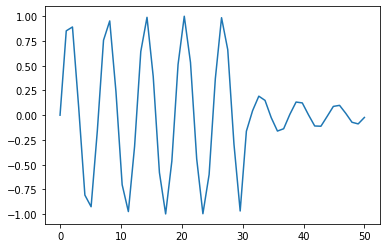

In [43]:
#inp = pickle.load(open("inp", "rb"))
#out = pickle.load(open("out", "rb"))
#for i in range()
plt.plot(inp[3],out[3])
plt.show()

In [54]:
def treine(inp,out,epochs):
    #inp = pickle.load(open("inp", "rb"))
    #out = pickle.load(open("out", "rb"))
    n_batch = np.shape(inp)[0]
    batch_size = np.shape(inp)[1]
    n_examples = np.shape(inp)[2]
    for epoch in range(epochs):
        for n_batch_idx in range(n_batch):
            I = inp[n_batch_idx]
            A = out[n_batch_idx]
            #plt.plot(I,A)
            #plt.show()
            I = I.float()
            A = A.float()
            recon = model(I)
            loss = torch.mean((recon-A)**2)
            optimizer.zero_grad()
            loss.backward()
            optimizer.step()
            #s.exit()
        print(f'Epoch:{epoch+1},Loss:{loss.item():.4f}')



treine(inp, out, 200)

Epoch:1,Loss:1.2370
Epoch:2,Loss:1.2370
Epoch:3,Loss:1.2370
Epoch:4,Loss:1.2370
Epoch:5,Loss:1.2370
Epoch:6,Loss:1.2370
Epoch:7,Loss:1.2370
Epoch:8,Loss:1.2370
Epoch:9,Loss:1.2370
Epoch:10,Loss:1.2370
Epoch:11,Loss:1.2370
Epoch:12,Loss:1.2370
Epoch:13,Loss:1.2370
Epoch:14,Loss:1.2370
Epoch:15,Loss:1.2370
Epoch:16,Loss:1.2370
Epoch:17,Loss:1.2370
Epoch:18,Loss:1.2370
Epoch:19,Loss:1.2370
Epoch:20,Loss:1.2370
Epoch:21,Loss:1.2370
Epoch:22,Loss:1.2370
Epoch:23,Loss:1.2370
Epoch:24,Loss:1.2370
Epoch:25,Loss:1.2370
Epoch:26,Loss:1.2370
Epoch:27,Loss:1.2370
Epoch:28,Loss:1.2370
Epoch:29,Loss:1.2370
Epoch:30,Loss:1.2370
Epoch:31,Loss:1.2370
Epoch:32,Loss:1.2370
Epoch:33,Loss:1.2370
Epoch:34,Loss:1.2370
Epoch:35,Loss:1.2370
Epoch:36,Loss:1.2370
Epoch:37,Loss:1.2370
Epoch:38,Loss:1.2370
Epoch:39,Loss:1.2370
Epoch:40,Loss:1.2370
Epoch:41,Loss:1.2370
Epoch:42,Loss:1.2370
Epoch:43,Loss:1.2370
Epoch:44,Loss:1.2370
Epoch:45,Loss:1.2370
Epoch:46,Loss:1.2370
Epoch:47,Loss:1.2370
Epoch:48,Loss:1.2370
E

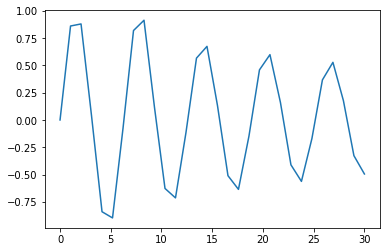

tensor([ 0.0000,  0.8596,  0.8785,  0.0381, -0.8395, -0.8960, -0.0762,  0.8182,
         0.9123,  0.1142, -0.6265, -0.7129, -0.1141,  0.5658,  0.6733,  0.1325,
        -0.5097, -0.6349, -0.1476,  0.4580,  0.5977,  0.1597, -0.4104, -0.5618,
        -0.1693,  0.3666,  0.5272,  0.1765, -0.3264, -0.4940])
--------------------
tensor([ 0.0000,  0.8596,  0.8785,  0.0381, -0.8395, -0.8960, -0.0762,  0.8182,
         0.9123,  0.1142, -0.6265, -0.7129, -0.1141,  0.5658,  0.6733,  0.1325,
        -0.5097, -0.6349, -0.1476,  0.4580,  0.5977,  0.1597, -0.4104, -0.5618,
        -0.1693,  0.3666,  0.5272,  0.1765, -0.3264, -0.4940])
--------------------
tensor([ 0.0000,  1.0345,  2.0690,  3.1034,  4.1379,  5.1724,  6.2069,  7.2414,
         8.2759,  9.3103, 10.3448, 11.3793, 12.4138, 13.4483, 14.4828, 15.5172,
        16.5517, 17.5862, 18.6207, 19.6552, 20.6897, 21.7241, 22.7586, 23.7931,
        24.8276, 25.8621, 26.8966, 27.9310, 28.9655, 30.0000])


RuntimeError: mat1 and mat2 shapes cannot be multiplied (1x30 and 1x300)

In [24]:
def treine(epochs):
    inp = pickle.load(open("inp", "rb"))
    out = pickle.load(open("out", "rb"))
    n_batch = np.shape(inp)[0]
    batch_size = np.shape(inp)[1]
    n_examples = np.shape(inp)[2]
    for epoch in range(epochs):
        for batch_idx in range(n_batch):
            I = inp[batch_idx]
            A = out[batch_idx]
            plt.plot(I[0],A[0])
            plt.show()
            I = I.float()
            A = A.float()
            print(A[0])
            print('-'*20)
            print(A[0])
            print('-'*20)
            for i in I:
                for j in range(len(n_examples)):
                    print(i)
                    recon, latent = model(i[j])
                    loss = torch.mean((recon-A)**2)
                    optimizer.zero_grad()
                    loss.backward()
                    optimizer.step()
        print(f'Epoch:{epoch+1},Loss:{loss.item():.4f}')
        s.exit()



treine(200)
# print('end')
# -------------------------------------------------------------------------------
# --------------------- SALVANDO-------------------------------------------------
# -------------------------------------------------------------------------------
# PATH_save='Estado_Box_2_with_two_latent.pt'
##PATH_load = 'Estado_Box_2_with_two_latent.pt'
#torch.save(model.state_dict(), PATH_save)
# s.exit()
##model.load_state_dict(torch.load(PATH_load))
#torch.save(model.state_dict(), PATH_save)


# 
# GRÁFICOS
# 

In [ ]:
def Latent_values_Scynet():
    for aux in range(n_batch):
        O = inp[aux].float()
        Q = question[aux].float()
        A = out[aux].float()
        j = J[aux]
        x = np.zeros(np.shape(j)[0])
        y1 = np.zeros(np.shape(j)[0])
        y2 = np.zeros(np.shape(j)[0])
        recon, latent = model(O, Q)
        for i in range(0, 499):
            x[i] = j[i]
            y1[i] = latent[i, 0]
            y2[i] = latent[i, 1]
        plt.scatter(x, y1, label='Latent Activation 1')
        plt.scatter(x, y2, label='Latent Activation 2')
        plt.xlabel('Momento angular total')
        plt.ylabel('Latent Activation')
        plt.legend()
        plt.pause(1.5)
        plt.close()

    plt.show()


Latent_values_Scynet()
# s.exit()
# -------------------------------------------------------------------------------


# An approach to predict when the prelude of mitosis occur